In [8]:
###########################
# HEADER:                 #
# Last Updated: 2.26.2020 #
# Notebook: Geo-ParseFn's #
# Owner: Samuel English   #
###########################

# IMPORTS:
import json
import csv
import periodictable
from collections import OrderedDict




In [9]:
#########################################################
# cleanString(string) function:                         #
# string = chemical formula you wish to cleanse.        #
#                                                       #
# return: cleansed string + ' ' appended for later use. #
#########################################################

def cleanString(str):
    dot = str.find('·')
    if dot == -1:
        pass
        # Do nothing!
    else:
        str = str[:dot]
        
    str = str.replace(',[box],', '')
    str = str.replace(',[box]', '')
    str = str.replace('[box],', '')
    str = str.replace('[box]', '')
    
    str = str.replace(',REE,', '')
    str = str.replace(',REE', '')
    str = str.replace('REE,', '')
    str = str.replace('REE', '')
    
# These lines are unnecessary because molarRatio() takes care of [] characters.    
#     str = str.replace('[','(')
#     str = str.replace(']',')')
    
    superscript = str.find('^')
    while superscript != -1:
        superscript = str.find('^')
        if superscript == -1:
            pass
        else:
            str = str[:superscript] + str[(superscript + 4):]

    return(str + ' ')
        
        
        

In [10]:
##################################################################################
# molarRatio(formula, elements) function:                                        #
# formula = chemical equation you wish to obtain a list of molar ratios for.     #
# elements = standardized list of elements appearing in formula.                 #
#                                                                                #
# return: dictionary object, containing each element and their respective count. #
##################################################################################

def molarRatio(formula, elements):
    elements = elements.split()
    dictionary =  {}
    de = 0

    for element in elements:
        RunningSum = 0
        Mult = formula
        instance = formula.find(element)

        while instance != -1:
            Count = 1
            Mult = Mult[(instance+len(element)):]

            if Mult[0] == '_':
                Mult = Mult[1:]
                NUS = Mult.find('_')
                number = Mult[:NUS]
                Count *= int(number)
            else:
                Count *= 1

            leftP = Mult.find('(')
            rightP = Mult.find(')')

            if rightP != -1 and leftP != -1:
                if rightP < leftP:
                    Mult = Mult[(rightP+1):]
                    if Mult[0] == '_':
                        Mult = Mult[1:]
                        NUS = Mult.find('_')
                        number = Mult[:NUS]
                        Count *= int(number)
                    else:
                        Count *= 1
                if leftP < rightP:
                    pass

            elif rightP != -1:
                Mult = Mult[(rightP+1):]
                if Mult[0] == '_':
                    Mult = Mult[1:]
                    NUS = Mult.find('_')
                    number = Mult[:NUS]
                    Count *= int(number)
                else:
                    Count *= 1
            else:
                pass
            
            leftS = Mult.find('[')
            rightS = Mult.find(']')
            copy = Mult

            if rightS != -1 and leftS != -1:
                if rightS < leftS:
                    copy = copy[(rightS+1):]
                    if copy[0] == '_':
                        copy = copy[1:]
                        NUS = copy.find('_')
                        number = copy[:NUS]
                        Count *= int(number)
                    else:
                        Count *= 1
                if leftS < rightS:
                    pass

            elif rightS != -1:
                copy = copy[(rightS+1):]
                if copy[0] == '_':
                    copy = copy[1:]
                    NUS = copy.find('_')
                    number = copy[:NUS]
                    Count *= int(number)
                else:
                    Count *= 1
            else:
                pass
            
            instance = Mult.find(element)
            RunningSum += Count
        
        dictionary[elements[0+de]] = RunningSum 
        de += 1
    
    return dictionary

    


In [11]:
########################################################################################
# commaReduce(formula) function:                                                       #
# formula = chemical equation with comma-delineated sets to be broken down into        #
# constituent parts.                                                                   #
#                                                                                      #
# return: dictionary object containing a formula for each permutation of the original. #
########################################################################################

def commaReduce(formula):
    default = formula
    insideKey = []
    total = 0
    
    leftP = -1
    rightP = 0
    
    while formula.find(',') != -1:
        leftP = formula.find('(', leftP+1)
        rightP = formula.find(')', rightP)

        insideKey.append(formula[leftP+1:rightP])
        formula = formula[:leftP+1] + '%' + formula[rightP:]
        total += 1   
    for x in range(0, total): 
        insideKey[x] = insideKey[x].split(',')
        insideKey[x] = [insideKey[x][0]]

    #print insideKey
    output = {}
    element = {'e0':0, 'e1':1, 'e2':2, 'e3':3, 'e4':4}  
    dx = 0
    #total = 1     
    if total == 0:
        output[0] = default
    
    elif total == 1:
        for element[0] in insideKey[0]:
            #print element[0]
            #print insideKey[0]
            copy = formula
            copy = copy.replace('%', element[0], 1)
            output[dx] = copy
            #print copy
            dx += 1
    elif total == 2:
        for element[0] in insideKey[0]:
            #print element[0]
            #print insideKey[0]
            for element[1] in insideKey[1]:
                copy = formula
                copy = copy.replace('%', element[0], 1)
                copy = copy.replace('%', element[1], 1)
                #print copy
                output[dx] = copy
                dx += 1
    elif total == 3:
        for element[0] in insideKey[0]:
            for element[1] in insideKey[1]:
                for element[2] in insideKey[2]:
                    copy = formula
                    copy = copy.replace('%', element[0], 1)
                    copy = copy.replace('%', element[1], 1)
                    copy = copy.replace('%', element[2], 1)
                    output[dx] = copy
                    dx += 1
    elif total == 4:
        for element[0] in insideKey[0]:
            for element[1] in insideKey[1]:
                for element[2] in insideKey[2]:
                    for element[3] in insideKey[3]:
                        copy = formula
                        copy = copy.replace('%', element[0], 1)
                        copy = copy.replace('%', element[1], 1)
                        copy = copy.replace('%', element[2], 1)
                        copy = copy.replace('%', element[3], 1)
                        output[dx] = copy
                        dx += 1
    elif total == 5:
        for element[0] in insideKey[0]:
            for element[1] in insideKey[1]:
                for element[2] in insideKey[2]:
                    for element[3] in insideKey[3]:  
                        for element[4] in insideKey[4]:
                            copy = formula
                            copy = copy.replace('%', element[0], 1)
                            copy = copy.replace('%', element[1], 1)
                            copy = copy.replace('%', element[2], 1)
                            copy = copy.replace('%', element[3], 1)
                            copy = copy.replace('%', element[4], 1)
                            output[dx] = copy
                            dx += 1
      
    return output
    
    


In [12]:
####################
# PRIMARY EXAMPLE: #
####################
formula = '(Cd,Ca,[box])(Cu,Zn,REE)_4_(SO_4_)_2_(OH)_6_·3H_2_O'
elements = 'Cd Ca Cu Zn S O H'
# These are what we would read in from the mineral database.

formula = cleanString(formula)
print(formula)
# Clean version of the original.

iterations = commaReduce(formula)
print('\n')
print(iterations)
# We permute the original formula into 4 different base cases.

for num in iterations:
    ratio = molarRatio(iterations[num], elements)
    print(ratio)
# For each permutation, we calculate its molar ratios and print the results.



######################
# SECONDARY EXAMPLE: #
######################
formula = 'Cu_3_(OH)_2_[(UO_2_)_4_O_4_(SO_4_)_2_]·12H_2_O'
elements = 'Cu O H U S'

formula = cleanString(formula)
print('\n')
print(formula)

iterations = commaReduce(formula)
print('\n')
print(iterations)

for num in iterations:
    ratio = molarRatio(iterations[num], elements)
    print(ratio)




(Cd,Ca)(Cu,Zn)_4_(SO_4_)_2_(OH)_6_ 


{0: '(Cd)(Cu)_4_(SO_4_)_2_(OH)_6_ '}
{'Zn': 0, 'H': 6, 'Ca': 0, 'O': 14, 'Cd': 1, 'S': 2, 'Cu': 4}


Cu_3_(OH)_2_[(UO_2_)_4_O_4_(SO_4_)_2_] 


{0: 'Cu_3_(OH)_2_[(UO_2_)_4_O_4_(SO_4_)_2_] '}
{'H': 2, 'S': 2, 'U': 4, 'O': 22, 'Cu': 3}


In [13]:
########################################################################################
# parseMinerals(datapath) function:                                                    #
# datapath = 'minerals.csv', name of local .csv file.                                  #
#                                                                                      #
# return: nested dictionary containing each mineral and respective chemical equation.  #
########################################################################################
def parseMinerals(datapath):
    cornercases = 0
    output = {}
    
    with open(datapath) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                mineral = str(row[1])
                output[mineral] = {}
                      
                formula = str(row[2])
                elements = str(row[3])
                      
                formula = cleanString(formula)
        # Filters out corner-case minerals, which currently break algorithm.
                if row[1].find('Here') != -1:
                    cornercases += 1
                elif row[1].find('Turkestanite') != -1:
                    cornercases += 1
                else:
                    iterations = commaReduce(formula)
        # Another filter of certain chemical formulas which break algorithm.
                if formula.find('-') == -1 and formula.find('.') == -1 and formula.find('),(') == -1 and formula.find('x_') == -1 and formula.find('Σ') == -1 and formula.find('/') == -1:
                    l = []
                    for num in iterations:
                        l.append(molarRatio(iterations[num], elements))
                        output[mineral] = l
                        
                else:
                    cornercases += 1

                line_count += 1
        print('\n')              
        print('Processed {line_count} lines.')
                      #5535 total should be processed.

        print('There are ' + str(cornercases) + ' corner cases!')
                     
    return output




In [14]:
########################################################################################
# findClosest(database,mystery) function:                                              #
# database: nested dictionary containing known minerals and molar ratios.              #
# mystery: unknown mineral, with input as follows (atomic number:weight percent):      #
# {'16':33.33, '26':33.33, '29':33.33, '33':0, '82':0}                                 # 
#                                                                                      #
# return: complete list of minerals with relative error values.                        #
########################################################################################
def findClosest(database,mystery):
    proxy = {}
    for mineral, composition in database.items():
        proxy[mineral] = []
        if (type(composition)) == list:
            # They all should be.
            for form in composition:
                temp = {}
                # We access each formula from the [] list.
                for key in form:
                    for el in periodictable.elements:
                        if el.symbol == key:
                            copy = key
                            copy = str(el.number)
                            temp[copy] = form[key]
                proxy[mineral].append(temp)
                
    # We've changed the input to atomic number.

    for mineral, composition in proxy.items():
        for form in composition:
            runningsum = 0
            for key in form:
                for el in periodictable.elements:
                    if str(el.number) == key:
                        form[key] *= el.mass
                        runningsum += form[key]
            for key in form:
                for el in periodictable.elements:
                    if str(el.number) == key:
                        if form[key] == 0:
                            pass
                        else:
                            form[key] /= runningsum
                            form[key] *= 100
                     
    # Collected and converted to weight percent for each mineral contained within the list.
    
    error = {}
    x = 0
    # Initialize number of objects and elements.

    for mineral, composition in proxy.items():
        error[mineral] = []
        for form in composition:
            subE = []
            formandmystery = form.copy()
            formandmystery.update(mystery)
            for key in formandmystery:
                if (key in mystery) and (key in form):
                    if mystery[key] == 0:
                        subE.append(form[key])
                    elif form[key] == 0:
                        subE.append(mystery[key])
                    else:
                        if mystery[key]-form[key] == 0:
                        # If for some reason both percentages match exactly.
                            subE.append(0.0001)
                        else:
                            erf = (abs((mystery[key]-form[key])/form[key]))
                            subE.append(erf)
                        
                else:
                    if key in mystery:
                        subE.append(mystery[key])
                    if key in form:
                        subE.append(form[key])
                # Take into account if minerals don't match!
                    
            error[mineral].append(subE)
            
    total = {}

    for mineral,element in error.items():
        total[mineral] = []
        for lists in element:
            temp = 0
            hold = []
            for error in lists:
                temp += error
            if temp == 0:
                hold.append(999)
            else:
                hold.append(temp)
            total[mineral].append(hold)
    
    for mineral,element in total.items():
        ordered = sorted(element)
        total[mineral] = ordered[:1]
    # Sort and take the first (lowest) error value from each permutation set.
    
    for mineral,error in total.items():
        if error == []:
            error.append(999)
            total[mineral] = error[0]
        # Account for if corner case, containing no object [].
        else:
            for value in error:
                total[mineral] = value[0]
        # Set the current dictionary mineral to a float value from list.
                
                
            
    ordered_list = {}
    ordered_list = (sorted(total.items(),key=lambda x: x[1]))
    # Returns sorted list of minerals, from lowest to highest error.
    
    return ordered_list

    
    

In [15]:
########################################################################################
# findClosest(database,mystery) function:                                              #
# database: nested dictionary containing known minerals and molar ratios.              #
# mystery: unknown mineral, with input as follows (atomic number:weight percent):      #
# {'16':33.33, '26':33.33, '29':33.33, '33':0, '82':0}                                 # 
#                                                                                      #
# return: complete list of minerals with relative error values.                        #
########################################################################################
def weightpercentdict(database):
    proxy = {}
    for mineral, composition in database.items():
        proxy[mineral] = []
        if (type(composition)) == list:
            # They all should be.
            for form in composition:
                temp = {}
                # We access each formula from the [] list.
                for key in form:
                    for el in periodictable.elements:
                        if el.symbol == key:
                            copy = key
                            copy = str(el.number)
                            temp[copy] = form[key]
                proxy[mineral].append(temp)
                
    # We've changed the input to atomic number.

    for mineral, composition in proxy.items():
        for form in composition:
            runningsum = 0
            for key in form:
                for el in periodictable.elements:
                    if str(el.number) == key:
                        form[key] *= el.mass
                        runningsum += form[key]
            for key in form:
                for el in periodictable.elements:
                    if str(el.number) == key:
                        if form[key] == 0:
                            pass
                        else:
                            form[key] /= runningsum
                            form[key] *= 100
    return proxy   

    # Collected and converted to weight percent for each mineral contained within the list.
def findClosest(proxy,mystery):    
    error = {}
    x = 0
    # Initialize number of objects and elements.

    for mineral, composition in proxy.items():
        error[mineral] = []
        for form in composition:
            subE = []
            formandmystery = form.copy()
            formandmystery.update(mystery)
            for key in formandmystery:
                if (key in mystery) and (key in form):
                    if mystery[key] == 0:
                        subE.append(form[key])
                    elif form[key] == 0:
                        subE.append(mystery[key])
                    else:
                        if mystery[key]-form[key] == 0:
                        # If for some reason both percentages match exactly.
                            subE.append(0.0001)
                        else:
                            erf = (abs((mystery[key]-form[key])/form[key]))
                            subE.append(erf)
                        
                else:
                    if key in mystery:
                        subE.append(mystery[key])
                    if key in form:
                        subE.append(form[key])
                # Take into account if minerals don't match!
                    
            error[mineral].append(subE)
            
    total = {}

    for mineral,element in error.items():
        total[mineral] = []
        for lists in element:
            temp = 0
            hold = []
            for error in lists:
                temp += error
            if temp == 0:
                hold.append(99999999)
            else:
                hold.append(temp)
            total[mineral].append(hold)
    
    for mineral,element in total.items():
        ordered = sorted(element)
        total[mineral] = ordered[:1]
    # Sort and take the first (lowest) error value from each permutation set.
    
    for mineral,error in total.items():
        if error == []:
            error.append(9999999)
            total[mineral] = error[0]
        # Account for if corner case, containing no object [].
        else:
            for value in error:
                total[mineral] = value[0]
        # Set the current dictionary mineral to a float value from list.
                
                
            
    ordered_list = {}
    ordered_list = (sorted(total.items(),key=lambda x: x[1]))
    # Returns sorted list of minerals, from lowest to highest error.
    
    return ordered_list


In [16]:
#########################################################
# saveData(filename,database):                          #
# filename: 'file.json' to be saved to local directory. #
# database: dictionary wished to be saved.              #
#                                                       #
# return: nothing, saves the file to local path.        #
#########################################################
def saveData(filename, database):
    with open(filename, 'w') as f:
        json.dump(database, f)

        
        

In [17]:
##########################################################
# readSave(filename):                                    #
# filename: 'file.json' to be read from local directory. #
#                                                        #
# return: dictionary containing file.json elements.      #
##########################################################
def readSave(filename):
    with open(filename) as infile:
        data = infile.read()
    d = json.loads(data)
        
    return d




In [18]:
##########################################################
# listsToDict(weight,number):                            #
# weight: list of atomic weight percentages.             #
# number: list of atomic numbers.                        #
#                                                        #
# return: dictionary containing {number:weight}.         #
##########################################################
def listsToDict(weight,number):
    for element in range(len(number)):
        number[element] = str(number[element])
    
    dict = {str(int(number[i])): weight[i] for i in range(len(number))}
    
    return dict




In [23]:
####################
# PRIMARY EXAMPLE: #
####################
base = parseMinerals('minerals.csv')
# We first create a dictionary containing each mineral and its respective molar ratio counts.
# print(base)

num = 0
for key,formula in base.items():
    num += 1
print('The parsed dictionary now contains {num} minerals.')
# We see how many of the minerals from the database were successfully parsed.

saveData('test.json', base)
# We save the fully-fleshed dictionary object as a json file for later access.

# SOME MYSTERY INPUTS TO CHECK ACCURACY:
########################################################################################################################
#"Marklite": [{"29": 57.58038011205965, "6": 6.529890203115049, "8": 34.79375067755215, "1": 1.0959790072731452}]
#"Ponomarevite": [{"19": 20.02200467900284, "29": 32.54152506200818, "8": 2.0482991694091432, "17": 45.388171089579835}]
#"Silicon": [{"14": 100.0}]
#"Vapnikite": [{"20": 26.468142171923787, "92": 52.39934653183001, "8": 21.132511296246186}]
#"Barioferrite": [{"56": 12.355599270002328, "26": 60.293906477235794, "8": 27.350494252761877}]
#"Bazzite-1": {"4": 4.714712584310188, "21": 15.679088195372016, "26": 0.0, "12": 0.0, "14": 29.385793648340393, "8": 50.22040557197741, "11": 0.0, "1": 0.0}
#"Bazzite-2": {"4": 4.542211071237476, "21": 0.0, "26": 18.764214724266694, "12": 0.0, "14": 28.3106286671175, "8": 48.38294553737833, "11": 0.0, "1": 0.0}
########################################################################################################################

weight = [4.5, 0, 18.8, 0, 28.3, 48.4]
number = [4, 21, 26, 12, 14, 8]
# Given a mysterious element with these atomic weights and corresponding atomic numbers.

mystery = listsToDict(weight, number)
# We convert the two separate lists into an accessible dictionary {number:weight}
print(mystery)

test = readSave('test.json')
# We read in the parsed database json object, saving it as a dictionary for current use.
# print(test)

perecentdict=weightpercentdict(test)
truth = findClosest(perecentdict, mystery)
print(truth[:5])
truth = findClosest(perecentdict,{"20": 26.468142171923787, "92": 52.39934653183001, "8": 21.132511296246186})
# Using simple error algorithm, we find the lowest error mineral corresponding to our mystery input.
print(truth[:5])
# We print the top five candidates matching the mysterious input sample.



# CURRENT ISSUES:
# Does not consider the total atomic mass, only the relative weight percents?
# Currently takes lowest error of given comma set list. Does not specify which permutation is best. Not necessarily bad.
# Comma lists take 100% of given element permutation, does not attempt to split up in portions as seen on webmineral.com
# IE (Na,K) does not correspond to some (x%Na, y%K). It has (100%Na, 0%K) OR (0%Na, 100%K).
# Also not necessarily bad, depends on how we want the functions to process.






Processed {line_count} lines.
There are 337 corner cases!
The parsed dictionary now contains {num} minerals.
{'26': 18.8, '12': 0, '14': 28.3, '4': 4.5, '8': 48.4, '21': 0}
[(u'Stoppaniite', 0.011928088513064107), (u'Ferrisepiolite', 5.237553210140315), (u'Ferripyrophyllite', 5.38549619677138), (u'Hiroseite', 5.715561070021379), (u'Ferrosilite', 5.715561070021379)]
[(u'Vapnikite', 0.00030000000000000003), (u'Vorlanite', 1.6358640508655728), (u'Metacalciouranoite', 3.642122979116425), (u'Calciouranoite', 3.642122979116425), (u'Wyartite', 8.347388092823659)]


In [1]:
import sys
sys.path.append("Z:\\Ben\\python\\v02\\")
import sigray
import numpy as np
import sklearn
from matplotlib import cm
import matplotlib as mpl
import itertools
from matplotlib import pyplot as plt
from sklearn import mixture
sig= sigray.sigray_datahandler()

sig.runGUI()

3.10.0


In [ ]:
sig.openFile(filepath="I:/#Toy08/RS20190116_06/",fileroot="RS20190116_06_Row",downsample=3)

In [49]:
widget = sig.state.mainframelayout.itemAt(0).widget()

In [50]:
print perecentdict[u'Sphalerite']


[{'30': 67.10404825902292, '16': 32.895951740977075}]


In [51]:
print widget.weightresults[0]
print widget.weightresults[0]
print widget.weightresults[1]

[[1.40000000e+01 1.60000000e+01 2.00000000e+01 2.40000000e+01
  2.60000000e+01 2.90000000e+01 3.00000000e+01 3.30000000e+01
  2.80000000e+01 8.20000000e+01]
 [0.00000000e+00 1.19097199e+01 5.94320552e-02 7.47356558e-02
  4.03318121e+00 2.88917090e-01 6.80616393e+01 2.40442748e+00
  3.31657934e-01 1.19698792e+01]]
[[1.40000000e+01 1.60000000e+01 2.00000000e+01 2.40000000e+01
  2.60000000e+01 2.90000000e+01 3.00000000e+01 3.30000000e+01
  2.80000000e+01 8.20000000e+01]
 [0.00000000e+00 1.19097199e+01 5.94320552e-02 7.47356558e-02
  4.03318121e+00 2.88917090e-01 6.80616393e+01 2.40442748e+00
  3.31657934e-01 1.19698792e+01]]
[[1.40000000e+01 1.60000000e+01 2.00000000e+01 2.40000000e+01
  2.60000000e+01 2.90000000e+01 3.00000000e+01 3.30000000e+01
  2.80000000e+01 8.20000000e+01]
 [3.01374335e+00 4.25394580e+01 1.26659841e-01 1.28808293e-02
  1.26067138e+01 1.25502557e+00 6.25317532e+00 6.61254012e+00
  4.99443886e-02 2.75298588e+01]]


In [52]:
region= widget.weightresults[0]

mystery = listsToDict(region[1], region[0])
print mystery

{'24': 0.07473565577063654, '26': 4.033181208733307, '20': 0.05943205522375484, '14': 0.0, '16': 11.909719881193514, '33': 2.4044274768694085, '30': 68.0616392958646, '28': 0.33165793361209306, '29': 0.28891708986086245, '82': 11.969879182578518}


In [53]:
#test = readSave('test.json')
#cubanite = {"10":0.5,"11":0.5,"12":0.5,"16":40.77,"26":2.2,"29":0.0,"30":55.45}
cubanite = {"16":40.77,"30":69.45}
#cubanite = {"30":69.64,"16":19.1918, '29.0': 0.3165486344194492,'26.0': 4.114249730733314,'82.0': 3.420003333586791,'33.0': 1.7789717899428898,'20.0': 0.05699988557401237,'21.0': 0.05699988557401237,'22.0': 0.05699988557401237}
#cubanite  = { "30.0": 69.64,    "16.0": 40.19}

print cubanite
print mystery
truth = findClosest(perecentdict,mystery)
# Using simple error algorithm, we find the lowest error mineral corresponding to our mystery input.
print(truth[:7])
truth = findClosest(perecentdict,cubanite)
# Using simple error algorithm, we find the lowest error mineral corresponding to our mystery input.
print(truth[:7])

{'30': 69.45, '16': 40.77}
{'24': 0.07473565577063654, '26': 4.033181208733307, '20': 0.05943205522375484, '14': 0.0, '16': 11.909719881193514, '33': 2.4044274768694085, '30': 68.0616392958646, '28': 0.33165793361209306, '29': 0.28891708986086245, '82': 11.969879182578518}
[(u'Polhemusite', 19.814458731967015), (u'Wurtzite', 19.814458731967015), (u'Sphalerite', 19.814458731967015), (u'Nowackiite', 22.344629016857645), (u'Kalininite', 22.90628672359381), (u'Tennantite-(Zn)', 25.634242528935665), (u'Zinc', 31.391334090883447)]
[(u'Polhemusite', 0.2743221405002952), (u'Wurtzite', 0.2743221405002952), (u'Sphalerite', 0.2743221405002952), (u'Kalininite', 37.15076411553585), (u'Glikinite', 37.61296863980719), (u'Zinc', 41.075500000000005), (u'Osakaite', 41.18211417559376)]


In [54]:
def returnoptions(truth):
    options = []
    value = truth[0][1]
    #print value
    options.append(truth[0])
    for op in truth[1:10]:
        if op[1] == value:
            options.append(op) 
    return options
        

for i in xrange(0,len( widget.weightresults)):
    print i
    region = widget.weightresults[i]
    #print region
    mystery = listsToDict(region[1], region[0])
    #print mystery
    truth = findClosest(perecentdict,mystery)
    print returnoptions(truth)

0
[(u'Polhemusite', 19.814458731967015), (u'Wurtzite', 19.814458731967015), (u'Sphalerite', 19.814458731967015)]
1
[(u'Shadlunite', 18.786644215459436)]
2
[(u'Linzhiite', 49.67082517747664)]
3
[(u'Sugakiite', 8.406992136302343)]
4
[(u'Nowackiite', 36.19734569446316)]
5
[(u'Omariniite', 25.577579711029024)]
6
[(u'Shadlunite', 16.532070884743238)]
7
[(u'Shadlunite', 13.643173004890178)]
8
[(u'Omariniite', 29.757441707419066)]
9
[(u'Polhemusite', 18.592504150433818), (u'Wurtzite', 18.592504150433818), (u'Sphalerite', 18.592504150433818)]
10
[(u'Seligmannite', 36.189844948622294)]
11
[(u'Arsenopyrite', 43.317316314981205)]
12
[(u'Linzhiite', 14.789122216091176)]
13
[(u'Cubanite', 7.647342783943275), (u'Isocubanite', 7.647342783943275)]
14
[(u'Orickite', 14.18762408725036), (u'Chalcopyrite', 14.18762408725036)]
15
[(u'Polhemusite', 15.341963088902396), (u'Wurtzite', 15.341963088902396), (u'Sphalerite', 15.341963088902396)]
16
[(u'Baumhauerite II', 6.772803964404369), (u'Baumhauerite', 6.772

In [ ]:
    region = widget.weightresults[50]
    mystery = listsToDict(region[1], region[0])
    #print mystery
    truth = findClosest(perecentdict,mystery)
    print(truth[:20])

In [28]:
fileforfp =sig.state.currentwindow.maintree.topLevelItem(0)



In [29]:
fpmodel = fileforfp.child(2).child(0)

In [30]:
print fpmodel.model.elemetnstocalc

[[16. 26.]
 [54. 46.]]


In [47]:
fpmodel.model.elemetnstocalc = np.asarray([[16,30,26],[33.0,64.0,2.8]])

In [56]:
fpmodel.model.resultcurves

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+00, 1.06982965e-13, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 8.34454071e-08, 0.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 5.02255938e-05, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 3.64874513e-12, 0.00000000e+00, 0.00000000e+00],
       [9.00000000e+00, 4.27971453e-09, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+01, 1.38137843e-05, 0.00000000e+00, 0.00000000e+00],
       [1.10000000e+01, 5.91971088e-04, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+01, 8.39788951e-03, 0.00000000e+00, 0.00000000e+00],
       [1.30000000e+01, 6.99215172e-02, 0.00000000e

In [120]:
print fpmodel.model.sourcebesepctra

[[4.00000000e-002 8.02053621e-171]
 [8.00000000e-002 4.00579762e-171]
 [1.20000000e-001 0.00000000e+000]
 ...
 [3.99200000e+001 9.14542342e-008]
 [3.99600000e+001 9.15004504e-008]
 [4.00000000e+001 9.15465107e-008]]


In [121]:
toplot = fpmodel.model.sourcebesepctra.T

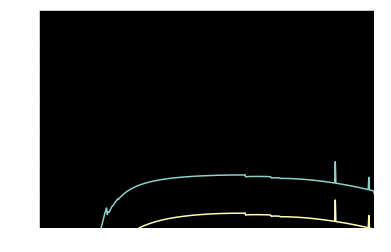

In [122]:
from matplotlib import pyplot as plt
myFPModel = fpmodel.model
xaxis = myFPModel.postmirrorspectra[:,0]
plt.figure()

plt.plot(xaxis,myFPModel.postmirrorspectra[:,1])
plt.plot(xaxis,myFPModel.elastic[:,1])

plt.yscale('log', nonposy='clip')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,20,.0001,y2))
plt.show()

In [123]:
intspec = sig.getSpectra(0,0)

Returned File: RS20190116_06_Row
Returned Spectra: Integral Spectra


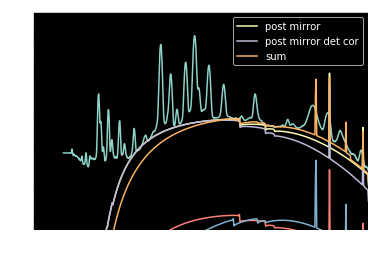

In [154]:
import sigray_fpmodel as fp
decettorefficentcurve = fp.DetectorTransform(myFPModel.postmirrorspectra)
plt.figure()
plt.plot(intspec.eaxis,intspec.spectra)
plt.plot(xaxis,10000*myFPModel.postmirrorspectra[:,1],label="post mirror")
plt.plot(xaxis,10000*decettorefficentcurve[:,1],label="post mirror det cor")
plt.plot(xaxis,100000*myFPModel.elastic[:,1])
plt.plot(xaxis,100000*myFPModel.inelastic[:,1])
plt.plot(xaxis,17000000*(myFPModel.inelastic[:,1]+2*myFPModel.elastic[:,1]),label = "sum")
plt.legend()
plt.yscale('log', nonposy='clip')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,20,100,100000000))
plt.show()

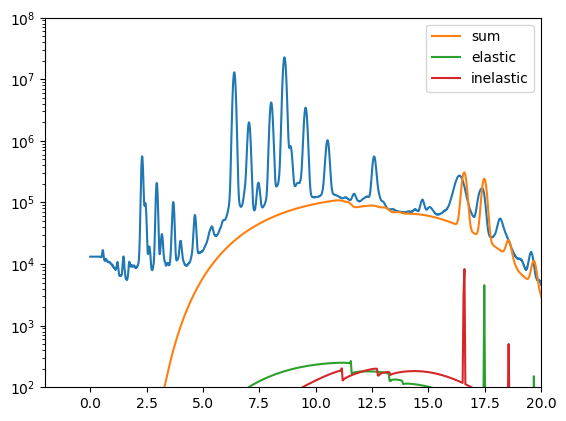

List of Clusters
FP Model
Cluster
Cluster
FP Model
index of top level item
0


In [167]:
plt.style.use('default')
sumelasticx= myFPModel.inelastic[:,0]

sumelasticy =(myFPModel.inelastic[:,1]+2*myFPModel.elastic[:,1])
decettorefficentcurve = fp.GaussainBlurSpectr(np.asarray([sumelasticx,sumelasticy]).T,.105)
plt.figure()
plt.plot(intspec.eaxis,intspec.spectra)
#plt.plot(xaxis,10000*myFPModel.postmirrorspectra[:,1])
plt.plot(xaxis,16000000*decettorefficentcurve[:,1],label = "sum")
plt.plot(xaxis,100000*myFPModel.elastic[:,1],label="elastic")
plt.plot(xaxis,100000*myFPModel.inelastic[:,1],label="inelastic")
plt.legend()
plt.yscale('log', nonposy='clip')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,20,100,100000000))
plt.show()